# Image Manipulation in BART

In this notebook we will explore BART's capacity for image manipulation.

In particular, we will explore the `avg`, `conv`, `crop`, `filter`, `flatten`, `flip`, `invert`, `mip`, `noise`, `phantom`, `repmat`, `reshape`, `resize`, `sdot`, `slice`, and `threshold` commands.

## TODO

* [ ] gnuplot

* `phantom`
 * `-t` flag usage
 * `-s` understanding coil sensitivity
 * Phantom in k-space doesn't quite look correct
 
* `avg`
 * default value of `-W`
 * intuition for the process

## Documentation Observations

* `phantom`
 * `-s` flag cannot have a value greater than 8

In [1]:
bart

BART. Available commands are:
avg         bench       bitmask     cabs        caldir      calmat      
carg        casorati    cc          ccapply     cdf97       circshift   
conj        conv        copy        cpyphs      creal       crop        
delta       ecalib      ecaltwo     estdelay    estdims     estshift    
estvar      extract     fakeksp     fft         fftmod      fftshift    
filter      flatten     flip        fmac        homodyne    invert      
itsense     join        lrmatrix    mandelbrot  mip         nlinv       
noise       normalize   nrmse       nufft       ones        pattern     
phantom     pics        pocsense    poisson     repmat      reshape     
resize      rof         rss         sake        saxpy       scale       
sdot        show        slice       spow        sqpics      squeeze     
std         svd         threshold   toimg       traj        transpose   
twixread    var         vec         version     walsh       wave        
wavelet     wavepsf  

: 1

## Utilities

The following function displays images such that we can view the results of our work

In [7]:
# BASH function to write BART file to png,
# display the png, and then temove it
function imshow () {
    bart toimg $1 $1
    cat $1.png | display
    rm $1.png
}

## Generating a Phantom

We will be performing initial manipulations on a Shepp-Logan numerical phantom. A phantom can be generated using the `phantom` command.

In [20]:
bart phantom -h

Usage: phantom [-s d] [-S d] [-k] [-t <string>] [-x d] [-3] <output>

Image and k-space domain phantoms.

-s nc      	nc sensitivities
-S Output nc sensitivities
-k		k-space
-t file      	trajectory
-x n      	dimensions in y and z
-3		3D
-h		help


Note that `-s` cannot be larger than 8

In [13]:
bart phantom -x 256 shepp_logan

Where we use `-x` to specify the dimension

Writing 1 image(s)...done.


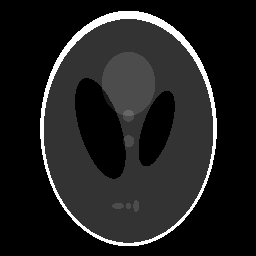

In [14]:
imshow shepp_logan

We can also generate the phantom in K-Space, using the `-k` flag. `-t` specifies a trajectory file.

Writing 1 image(s)...done.


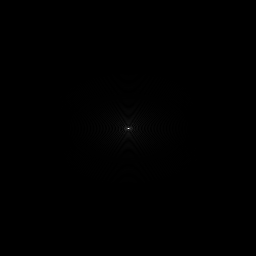

In [16]:
bart phantom -x 256 -k shepp_logan_k_space

imshow shepp_logan_k_space

#### TODO: This doesn't look quite right?

## ` bart avg`

In [17]:
bart avg -h

Usage: avg [-w] <bitmask> <input> <output>

Calculates (weighted) average along dimensions specified by bitmask.

-w		weighted average
-h		help


We use the `bitmask` function to specify dimensions 

In [ ]:
`$(bart bitmask 2)`

4: command not found
